<a href="https://colab.research.google.com/github/rnarendranath/Awesome-App/blob/master/Cervical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installing Libraries**

In [161]:
import numpy as np
import pandas as pd
!pip install catboost
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

uploaded=files.upload()


Saving kag_risk_factors_cervical_cancer.csv to kag_risk_factors_cervical_cancer (2).csv


**Importing the Dataset**

In [162]:
data = pd.read_csv("kag_risk_factors_cervical_cancer.csv")

print(data.shape)

data.head()

(858, 36)


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [164]:
data.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [165]:
# determining the null values in each column

data = data.replace("?", np.nan)
data = data._convert(numeric = True)

data.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [166]:
data.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [167]:
# 0 means not cancer affected and 1 means cancer affected cell

data['Biopsy'].value_counts()

0    803
1     55
Name: Biopsy, dtype: int64

In [168]:
# various number of sexual partners in the given dataset

data['Number of sexual partners'].value_counts()

2.0     272
3.0     208
1.0     206
4.0      78
5.0      44
6.0       9
7.0       7
8.0       4
15.0      1
10.0      1
28.0      1
9.0       1
Name: Number of sexual partners, dtype: int64

** Correlation Plot**

<Axes: >

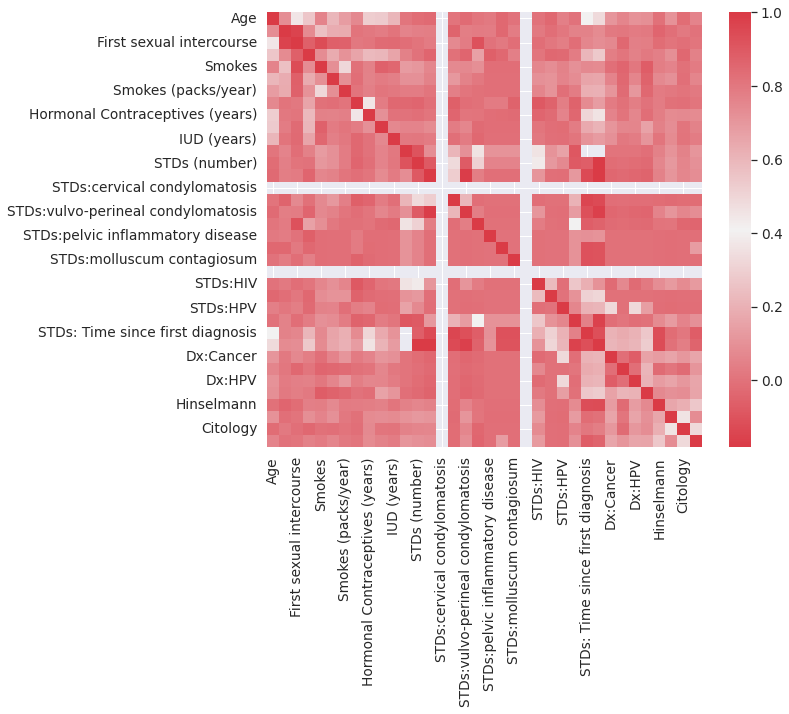

In [169]:
# correlation plot

f, ax = plt.subplots(figsize = (10, 8))

corr = data.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = bool), 
            cmap = sns.diverging_palette(10, 10, as_cmap = True), square = True, ax = ax)

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


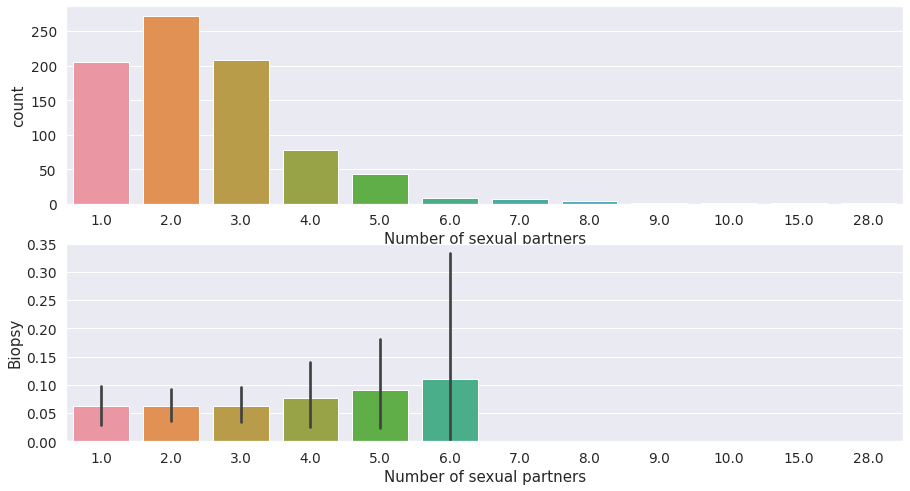

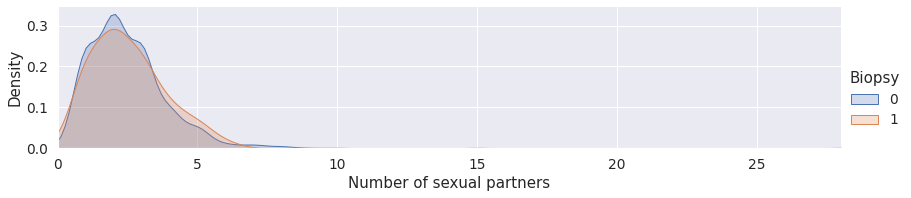

In [170]:
# Biopsy vs no. of sexual partners

#categorical to categorical
fig, (ax1,ax2) = plt.subplots(2, 1, figsize = (15, 8))
sns.countplot(x = 'Number of sexual partners', data = data, ax=ax1)
sns.barplot(x = 'Number of sexual partners', y = 'Biopsy', data = data, ax=ax2) 

#continuous to categorical
facet = sns.FacetGrid(data, hue='Biopsy',aspect=4)
facet.map(sns.kdeplot,'Number of sexual partners',shade= True)
facet.set(xlim=(0, data['Number of sexual partners'].max()))
facet.add_legend()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


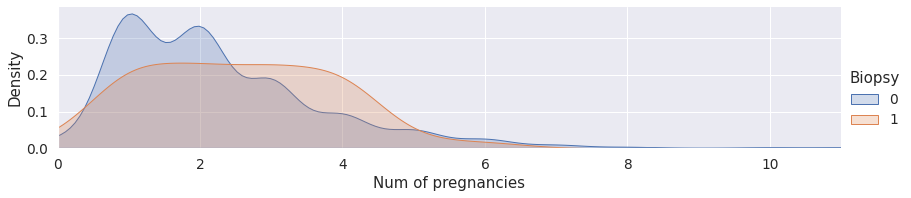

In [171]:
#continuous to categorical
facet = sns.FacetGrid(data, hue='Biopsy', aspect=4)
facet.map(sns.kdeplot,'Num of pregnancies', shade= True)
facet.set(xlim=(0, data['Num of pregnancies'].max()))
facet.add_legend()

<Axes: xlabel='Citology', ylabel='Biopsy'>

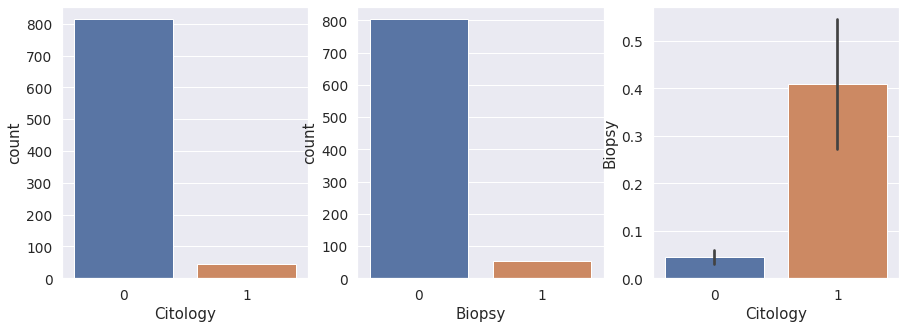

In [172]:
fig, (axis1,axis2,axis3) = plt.subplots(1, 3, figsize = (15, 5))
sns.countplot(x = 'Citology', data=data, ax = axis1)
sns.countplot(x = 'Biopsy', data = data, ax = axis2)
sns.barplot(x = 'Citology', y = 'Biopsy', data = data, ax = axis3)

<Axes: xlabel='Schiller', ylabel='Biopsy'>

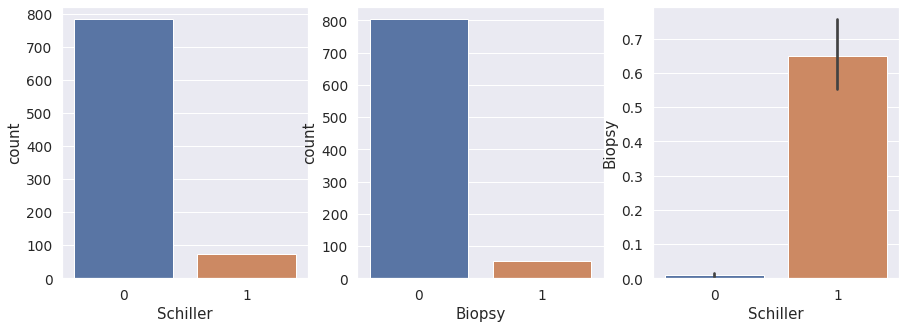

In [173]:
# Biopsy vs schiller

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x='Schiller', data=data, ax=axis1)
sns.countplot(x='Biopsy', data=data, ax=axis2)
sns.barplot(x='Schiller', y='Biopsy', data=data, ax=axis3)

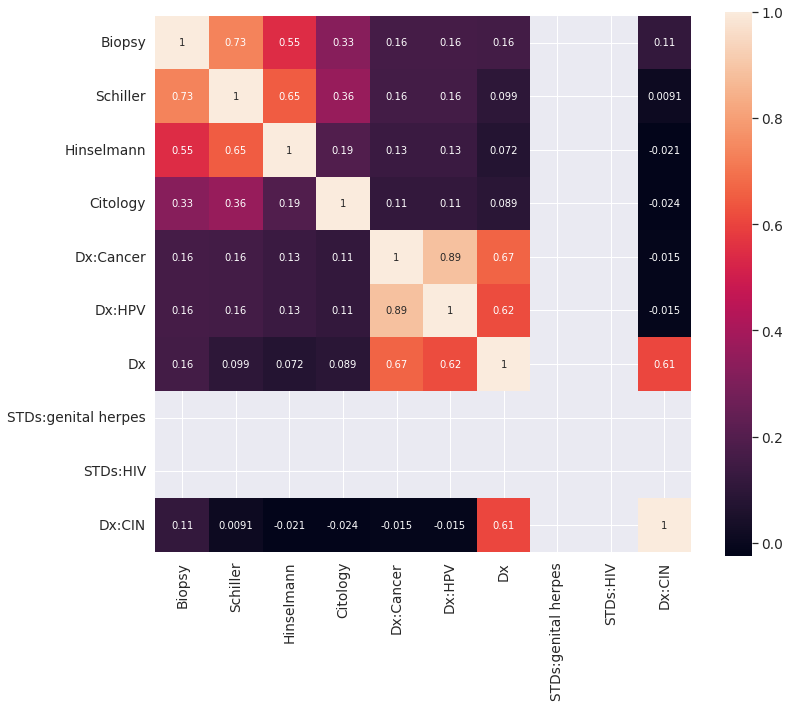

In [174]:
# list the heatmap of top correlation

corr = data.corr()

# number of variables for heatmap
k = 10

cols = corr.nlargest(k, 'Biopsy')['Biopsy'].index
cm = np.corrcoef(data[cols].values.T)

plt.figure(figsize=(12, 10))

sns.set(font_scale=1.25)
sns.heatmap(cm, cbar = True, annot = True, square = True, annot_kws = {'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()

**Data Preprocessing**

In [175]:
# Imputing the missing values from the given dataset
# we will impute the categorical variables with 0 or 1 and continuous variables with median value

data['Number of sexual partners'] = data['Number of sexual partners'].fillna(data['Number of sexual partners'].median())
data['Number of sexual partners'].isnull().any()

# data['Number of sexual partners'].value_counts()

False

In [176]:
# Imputing the missing values from First sexual intercourse

data['First sexual intercourse'] = data['First sexual intercourse'].fillna(data['First sexual intercourse'].median())
data['First sexual intercourse'].isnull().any()

# data['First sexual intercourse'].value_counts()

False

In [177]:
# Imputing the missing values from Num of pregnancies

data['Num of pregnancies'] = data['Num of pregnancies'].fillna(data['Num of pregnancies'].median())
data['Num of pregnancies'].isnull().any()

# data['Num of pregnancies'].value_counts()

False

In [178]:
# Imputing the missing values from Smokes

data['Smokes'] = data['Smokes'].fillna(data['Smokes'].median())
data['Smokes'].isnull().any()

# data['Smokes'].value_counts()

False

In [179]:
# Imputing the missing values from Smokes (years)

data['Smokes (years)'] = data['Smokes (years)'].fillna(1)
data['Smokes (years)'].isnull().any()

# data['Smokes (years)'].value_counts()

False

In [180]:
# Imputing the missing values from Smokes (packs/year)

data['Smokes (packs/year)'] = data['Smokes (packs/year)'].fillna(data['Smokes (packs/year)'].median())
data['Smokes (packs/year)'].isnull().any()

# data['Smokes (packs/year)'].value_counts()

False

In [181]:
# Imputing the missing values from Hormonal Contraceptives

data['Hormonal Contraceptives'] = data['Hormonal Contraceptives'].fillna(data['Hormonal Contraceptives'].median())
data['Hormonal Contraceptives'].isnull().any()

# data['Hormonal Contraceptives'].value_counts()

False

In [182]:
# Imputing the missing values from Hormonal Contraceptives (years)

data['Hormonal Contraceptives (years)'] = data['Hormonal Contraceptives (years)'].fillna(data['Hormonal Contraceptives (years)'].median())
data['Hormonal Contraceptives (years)'].isnull().any()

# data['Hormonal Contraceptives (years)'].value_counts()

False

In [183]:
# Imputing the missing values from IUD

data['IUD'] = data['IUD'].fillna(0)
data['IUD'].isnull().any()

# data['IUD'].value_counts()

False

In [184]:
# Imputing the missing values from IUD (years)

data['IUD (years)'] = data['IUD (years)'].fillna(0)
data['IUD (years)'].isnull().any()

# data['IUD (years)'].value_counts()

False

In [185]:
# Imputing the missing values from STDs

data['STDs'] = data['STDs'].fillna(1)
data['STDs'].isnull().any()

# data['STDs'].value_counts()

False

In [186]:
# Imputing the missing values from STDs (number)

data['STDs (number)'] = data['STDs (number)'].fillna(data['STDs (number)'].median())
data['STDs (number)'].isnull().any()

# data['STDs (number)'].value_counts()

False

In [187]:
# Imputing the missing values from STDs:condylomatosis

data['STDs:condylomatosis'] = data['STDs:condylomatosis'].fillna(data['STDs:condylomatosis'].median())
data['STDs:condylomatosis'].isnull().any()

# data['STDs:condylomatosis'].value_counts()

False

In [188]:
# Imputing the missing values from STDs:cervical condylomatosis

data['STDs:cervical condylomatosis'] = data['STDs:cervical condylomatosis'].fillna(data['STDs:cervical condylomatosis'].median())
data['STDs:cervical condylomatosis'].isnull().any()

# data['STDs:cervical condylomatosis'].value_counts()

False

In [189]:
# Imputing the missing values from STDs:vaginal condylomatosis

data['STDs:vaginal condylomatosis'] = data['STDs:vaginal condylomatosis'].fillna(data['STDs:vaginal condylomatosis'].median())
data['STDs:vaginal condylomatosis'].isnull().any()

# data['STDs:vaginal condylomatosis'].value_counts()

False

In [190]:
# Imputing the missing values from STDs:vulvo-perineal condylomatosis

data['STDs:vulvo-perineal condylomatosis'] = data['STDs:vulvo-perineal condylomatosis'].fillna(data['STDs:vulvo-perineal condylomatosis'].median())
data['STDs:vulvo-perineal condylomatosis'].isnull().any()

# data['STDs:vulvo-perineal condylomatosis'].value_counts()

False

In [191]:
# Imputing the missing values from STDs:syphilis

data['STDs:syphilis'] = data['STDs:syphilis'].fillna(data['STDs:syphilis'].median())
data['STDs:syphilis'].isnull().any()

# data['STDs:syphilis'].value_counts()

False

In [192]:
# Imputing the missing values from STDs:pelvic inflammatory diseases

data['STDs:pelvic inflammatory disease'] = data['STDs:pelvic inflammatory disease'].fillna(data['STDs:pelvic inflammatory disease'].median())
data['STDs:pelvic inflammatory disease'].isnull().any()

# data['STDs:pelvic inflammatory disease'].value_counts()

False

In [193]:
# Imputing the missing values from STDs:genital herpes

data['STDs:genital herpes'] = data['STDs:genital herpes'].fillna(data['STDs:genital herpes'].median())
data['STDs:genital herpes'].isnull().any()

# data['STDs:genital herpes'].value_counts()

False

In [194]:
# Imputing the missing values from STDs:molluscum contagiosum

data['STDs:molluscum contagiosum'] = data['STDs:molluscum contagiosum'].fillna(data['STDs:molluscum contagiosum'].median())
data['STDs:molluscum contagiosum'].isnull().any()

# data['STDs:molluscum contagiosum'].value_counts()

False

In [195]:
# Imputing the missing values from STDs:AIDS

data['STDs:AIDS'] = data['STDs:AIDS'].fillna(data['STDs:AIDS'].median())
data['STDs:AIDS'].isnull().any()

# data['STDs:AIDS'].value_counts()

False

In [196]:
# Imputing the missing values from STDs:HIV

data['STDs:HIV'] = data['STDs:HIV'].fillna(data['STDs:HIV'].median())
data['STDs:HIV'].isnull().any()

# data['STDs:HIV'].value_counts()

False

In [197]:
# Imputing the missing values from STDs:Hepatitis B

data['STDs:Hepatitis B'] = data['STDs:Hepatitis B'].fillna(data['STDs:Hepatitis B'].median())
data['STDs:Hepatitis B'].isnull().any()

# data['STDs:Hepatitis B'].value_counts()

False

In [198]:
# Imputing the missing values from STDs:HPV

data['STDs:HPV'] = data['STDs:HPV'].fillna(data['STDs:HPV'].median())
data['STDs:HPV'].isnull().any()

# data['STDs:HPV'].value_counts()

False

In [199]:
# Imputing the missing values from STDs: Time since first diagnosis

data['STDs: Time since first diagnosis'] = data['STDs: Time since first diagnosis'].fillna(data['STDs: Time since first diagnosis'].median())
data['STDs: Time since first diagnosis'].isnull().any()

# data['STDs: Time since first diagnosis'].value_counts()

False

In [200]:
# Imputing the missing values from STDs: Time since last diagnosis

data['STDs: Time since last diagnosis'] = data['STDs: Time since last diagnosis'].fillna(data['STDs: Time since last diagnosis'].median())
data['STDs: Time since last diagnosis'].isnull().any()
 
# data['STDs: Time since last diagnosis'].value_counts()

False

In [201]:
# Imputing values for categorical variables

#data = pd.get_dummies(data = data, columns = ['Smokes','Hormonal Contraceptives','IUD','STDs','Dx:Cancer','Dx:CIN','Dx:HPV','Dx','Hinselmann','Citology','Schiller'])

data.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [202]:
data.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.995338,2.257576,0.143357,1.216392,0.446278,0.686480,2.035331,0.096737,...,4.177156,3.233100,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.644759,2.791883,1.400981,0.350641,4.057974,2.210351,0.464194,3.567040,0.295771,...,1.785156,1.818927,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Data Visualization**

<Axes: xlabel='STDs (number)', ylabel='count'>

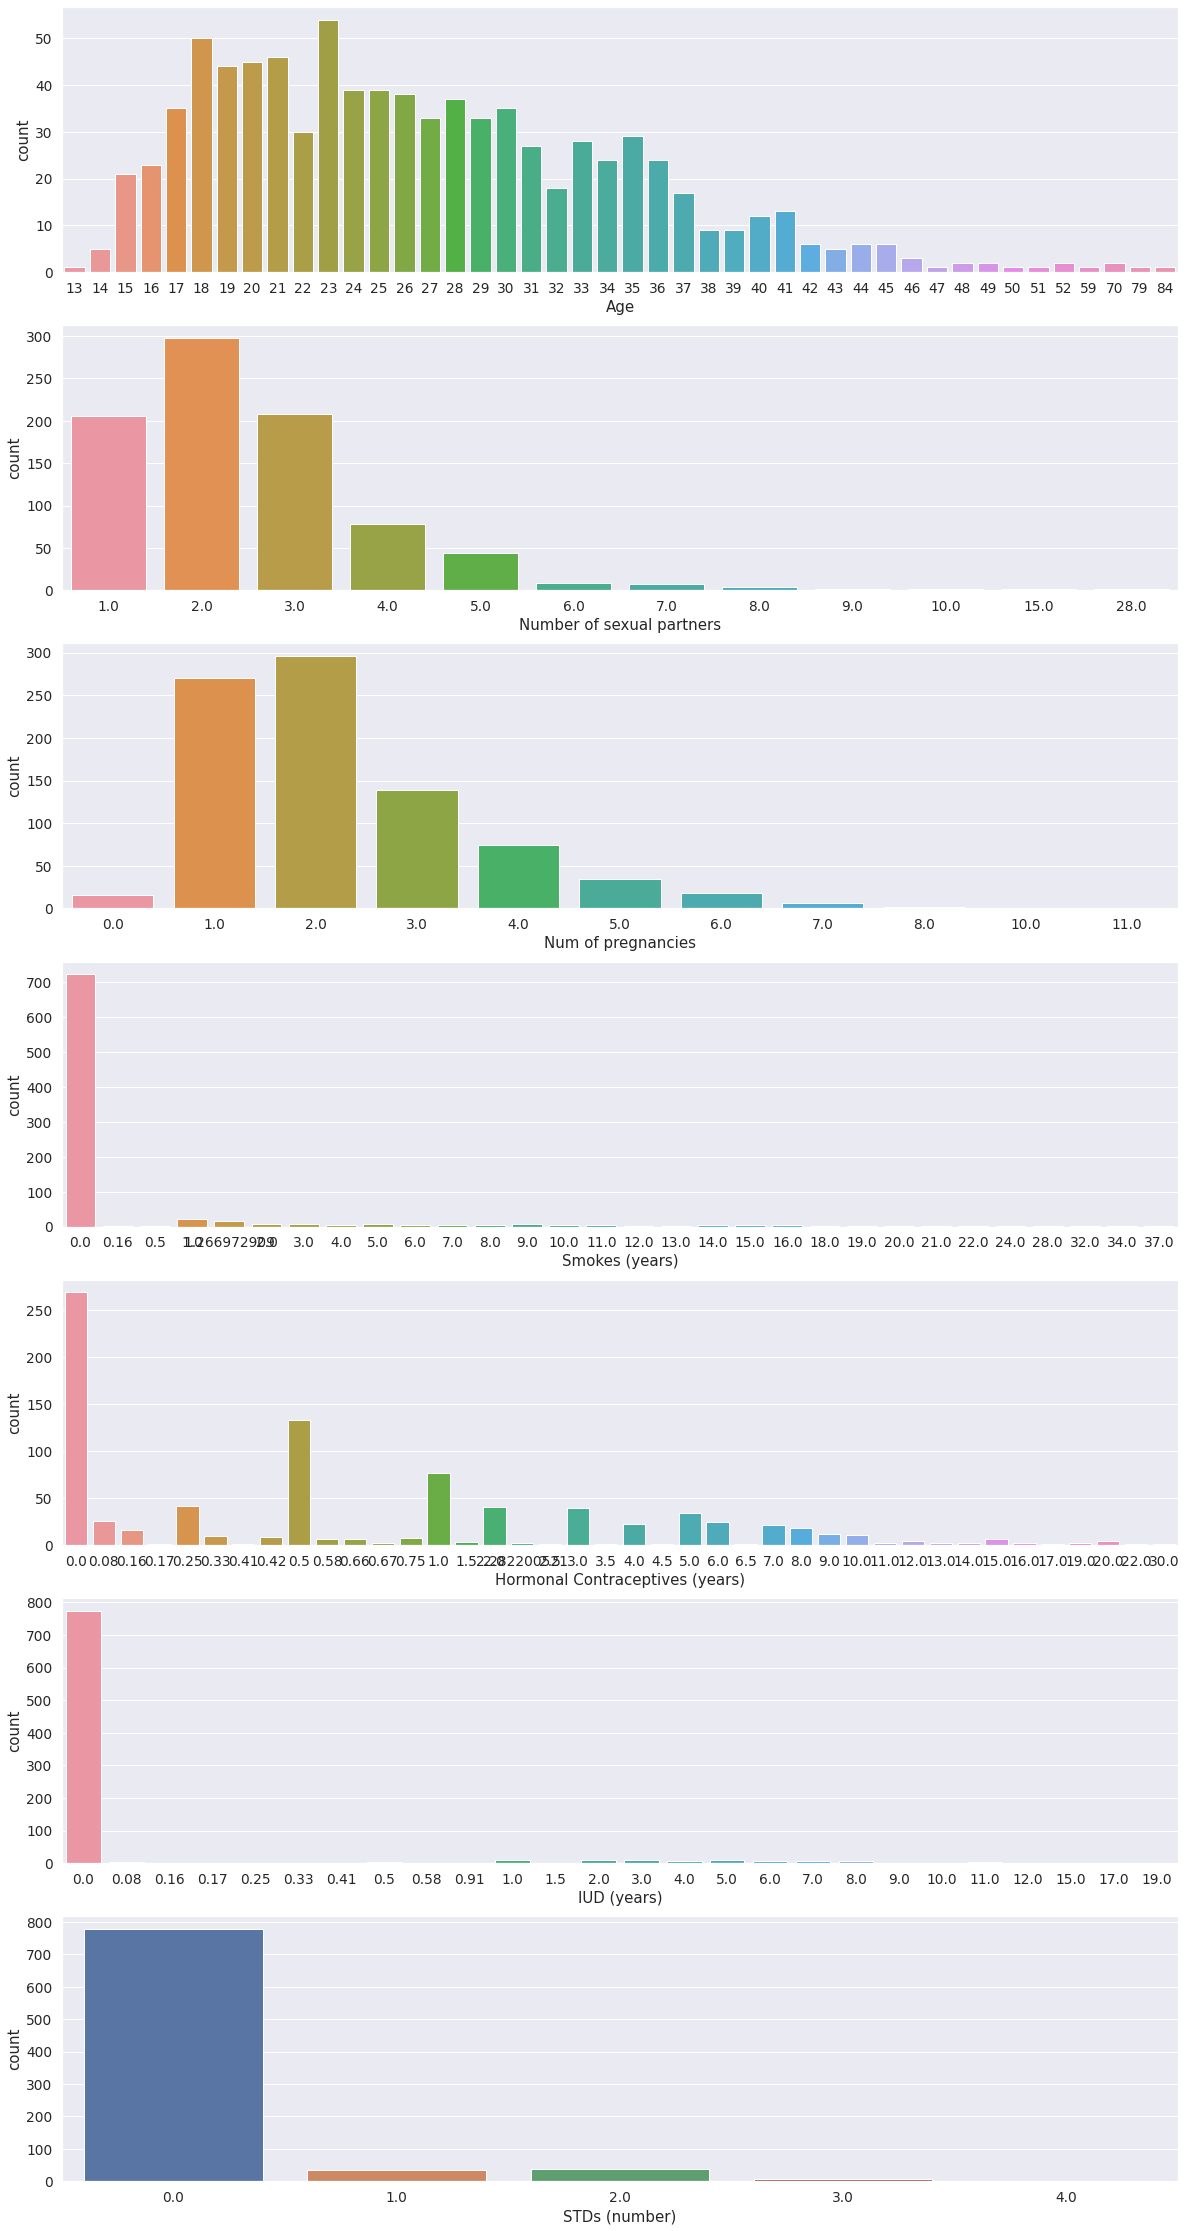

In [203]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(7, 1, figsize = (20,40))
sns.countplot(x='Age', data=data, ax=ax1)
sns.countplot(x='Number of sexual partners', data=data, ax=ax2)
sns.countplot(x='Num of pregnancies', data=data, ax=ax3)
sns.countplot(x='Smokes (years)', data=data, ax=ax4)
sns.countplot(x='Hormonal Contraceptives (years)', data=data, ax=ax5)
sns.countplot(x='IUD (years)', data=data, ax=ax6)
sns.countplot(x='STDs (number)', data=data, ax=ax7)

In [204]:
# splitting the dataset into dependent and independent variables
x = data.iloc[:, :-1]
y = data.iloc[:, -1]



print(x.shape)
print(y.shape)


(858, 35)
(858,)


In [205]:
y

0      0
1      0
2      0
3      0
4      0
      ..
853    0
854    0
855    0
856    0
857    0
Name: Biopsy, Length: 858, dtype: int64

In [206]:
x_features_categorical=[
 'Smokes','Hormonal_Contraceptives','IUD','STDs','STDs_condylomatosis','STDs_cervical_condylomatosis','STDs_vaginal_condylomatosis','STDs_vulvo_perineal_condylomatosis','STDs_syphilis','STDs_pelvic_inflammatory_disease','STDs_genital_herpes','STDs_molluscum_contagiosum','STDs_AIDS','STDs_HIV','STDs_Hepatitis_B','STDs_HPV','Dx_Cancer','Dx_CIN','Dx_HPV','Dx']
x_features_categorical

['Smokes',
 'Hormonal_Contraceptives',
 'IUD',
 'STDs',
 'STDs_condylomatosis',
 'STDs_cervical_condylomatosis',
 'STDs_vaginal_condylomatosis',
 'STDs_vulvo_perineal_condylomatosis',
 'STDs_syphilis',
 'STDs_pelvic_inflammatory_disease',
 'STDs_genital_herpes',
 'STDs_molluscum_contagiosum',
 'STDs_AIDS',
 'STDs_HIV',
 'STDs_Hepatitis_B',
 'STDs_HPV',
 'Dx_Cancer',
 'Dx_CIN',
 'Dx_HPV',
 'Dx']

In [207]:
x_features_numerical=[i for i in x if i not in x_features_categorical]
x_features_numerical

['Age',
 'Number of sexual partners',
 'First sexual intercourse',
 'Num of pregnancies',
 'Smokes (years)',
 'Smokes (packs/year)',
 'Hormonal Contraceptives',
 'Hormonal Contraceptives (years)',
 'IUD (years)',
 'STDs (number)',
 'STDs:condylomatosis',
 'STDs:cervical condylomatosis',
 'STDs:vaginal condylomatosis',
 'STDs:vulvo-perineal condylomatosis',
 'STDs:syphilis',
 'STDs:pelvic inflammatory disease',
 'STDs:genital herpes',
 'STDs:molluscum contagiosum',
 'STDs:AIDS',
 'STDs:HIV',
 'STDs:Hepatitis B',
 'STDs:HPV',
 'STDs: Number of diagnosis',
 'STDs: Time since first diagnosis',
 'STDs: Time since last diagnosis',
 'Dx:Cancer',
 'Dx:CIN',
 'Dx:HPV',
 'Hinselmann',
 'Schiller',
 'Citology']

In [208]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
X_new = SelectKBest(f_classif, k=10).fit_transform(x, y)
print(type(x))
print(type(X_new))
print(X_new.size)



<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
8580


/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [14 21] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [209]:
# splitting the dataset into  training and test set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 4)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(643, 35)
(643,)
(215, 35)
(215,)


In [210]:
# MinMaxScaling

from sklearn.preprocessing import MinMaxScaler

# creating a minmax scaler
mm = MinMaxScaler()

# feeding the independent data into the scaler
x_train = mm.fit_transform(x_train)
x_test = mm.fit_transform(x_test)

**Ensemble models**

**Random Forest**

In [211]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
# creating the model
RF = RandomForestClassifier(n_estimators=100,random_state=100, max_depth=7)

# feeding the training data into the model
RF.fit(x_train, y_train)

# predicting the test set results
y_pred = RF.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", RF.score(x_train, y_train))
print("Testing accuracy :", RF.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix 
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.9968895800933126
Testing accuracy : 0.9441860465116279
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       204
           1       0.46      0.55      0.50        11

    accuracy                           0.94       215
   macro avg       0.72      0.76      0.74       215
weighted avg       0.95      0.94      0.95       215

[[197   7]
 [  5   6]]


Confusion matrix

 [[ 1.          0.73320388  0.54741663  0.32746639  0.16090497  0.16090497
   0.15760664         nan         nan  0.11317233]
 [ 0.73320388  1.          0.65024919  0.36148649  0.1578116   0.1578116
   0.0989521          nan         nan  0.00911911]
 [ 0.54741663  0.65024919  1.          0.19246711  0.1342636   0.1342636
   0.07221485         nan         nan -0.02123252]
 [ 0.32746639  0.36148649  0.19246711  1.          0.11344608  0.11344608
   0.08873996         nan         nan -0.02393765]
 [ 0.16090497  0.1578116   0.1342636   0.11344608  1.          0.88650794
   0.66564706         nan         nan -0.01507176]
 [ 0.16090497  0.1578116   0.1342636   0.11344608  0.88650794  1.
   0.6163271          nan         nan -0.01507176]
 [ 0.15760664  0.0989521   0.07221485  0.08873996  0.66564706  0.6163271
   1.                 nan         nan  0.60693868]
 [        nan         nan         nan         nan         nan         nan
          nan         nan         nan      

<Axes: >

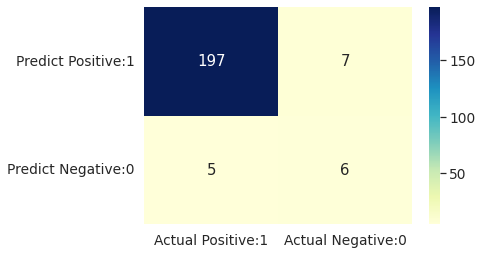

In [212]:
from sklearn.metrics import confusion_matrix

print('Confusion matrix\n\n', cm)

cm = confusion_matrix(y_test, y_pred)

print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

**AdaBoost Classifier**

In [213]:
from sklearn.ensemble import AdaBoostClassifier

# creating the model
model = AdaBoostClassifier()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix 
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.9906687402799378
Testing accuracy : 0.9348837209302325
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       204
           1       0.41      0.64      0.50        11

    accuracy                           0.93       215
   macro avg       0.70      0.79      0.73       215
weighted avg       0.95      0.93      0.94       215

[[194  10]
 [  4   7]]


Confusion matrix

 [[197   7]
 [  5   6]]

True Positives(TP) =  194

True Negatives(TN) =  7

False Positives(FP) =  10

False Negatives(FN) =  4


<Axes: >

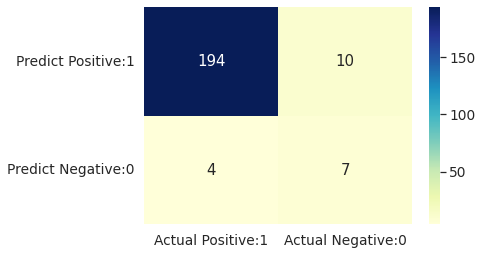

In [214]:
from sklearn.metrics import confusion_matrix

print('Confusion matrix\n\n', cm)

cm = confusion_matrix(y_test, y_pred)

print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

***Light GBM***

In [215]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import lightgbm as lgb

model = lgb.LGBMClassifier()

model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix 
print(confusion_matrix(y_test, y_pred))

Training accuracy : 1.0
Testing accuracy : 0.9302325581395349
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       204
           1       0.36      0.45      0.40        11

    accuracy                           0.93       215
   macro avg       0.66      0.71      0.68       215
weighted avg       0.94      0.93      0.93       215

[[195   9]
 [  6   5]]


Confusion matrix

 [[194  10]
 [  4   7]]

True Positives(TP) =  195

True Negatives(TN) =  5

False Positives(FP) =  9

False Negatives(FN) =  6


<Axes: >

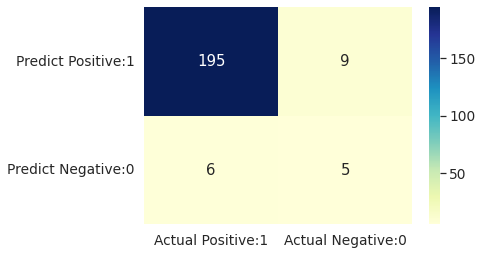

In [216]:
from sklearn.metrics import confusion_matrix

print('Confusion matrix\n\n', cm)

cm = confusion_matrix(y_test, y_pred)

print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


***Gradient Boosting***

In [218]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()

model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix 
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.9984447900466563
Testing accuracy : 0.9395348837209302
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       204
           1       0.44      0.64      0.52        11

    accuracy                           0.94       215
   macro avg       0.71      0.80      0.74       215
weighted avg       0.95      0.94      0.94       215

[[195   9]
 [  4   7]]


Confusion matrix

 [[195   9]
 [  6   5]]

True Positives(TP) =  195

True Negatives(TN) =  7

False Positives(FP) =  9

False Negatives(FN) =  4


<Axes: >

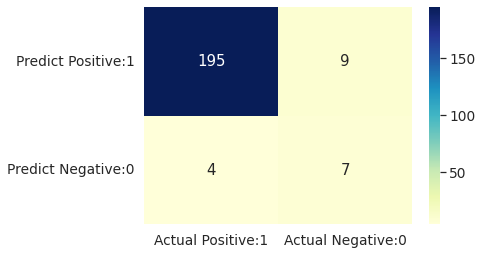

In [219]:
from sklearn.metrics import confusion_matrix

print('Confusion matrix\n\n', cm)

cm = confusion_matrix(y_test, y_pred)

print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

***Extreme Gradient Boosting CLassifier***

In [220]:
import xgboost as xgb
model = xgb.XGBClassifier()

model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix 
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.9984447900466563
Testing accuracy : 0.9255813953488372
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       204
           1       0.31      0.36      0.33        11

    accuracy                           0.93       215
   macro avg       0.64      0.66      0.65       215
weighted avg       0.93      0.93      0.93       215

[[195   9]
 [  7   4]]


Confusion matrix

 [[195   9]
 [  4   7]]

True Positives(TP) =  195

True Negatives(TN) =  4

False Positives(FP) =  9

False Negatives(FN) =  7


<Axes: >

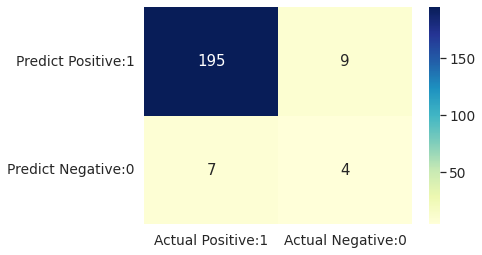

In [221]:
from sklearn.metrics import confusion_matrix

print('Confusion matrix\n\n', cm)

cm = confusion_matrix(y_test, y_pred)

print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

***CatBoost***

In [230]:

from catboost import CatBoostClassifier
model = CatBoostClassifier()
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix 
print(confusion_matrix(y_test, y_pred))


Learning rate set to 0.008532
0:	learn: 0.6742342	total: 50.5ms	remaining: 50.4s
1:	learn: 0.6569116	total: 53.4ms	remaining: 26.6s
2:	learn: 0.6397569	total: 55.2ms	remaining: 18.3s
3:	learn: 0.6226958	total: 57ms	remaining: 14.2s
4:	learn: 0.6065340	total: 59.5ms	remaining: 11.8s
5:	learn: 0.5877546	total: 61.4ms	remaining: 10.2s
6:	learn: 0.5777080	total: 63.4ms	remaining: 8.99s
7:	learn: 0.5621714	total: 65.2ms	remaining: 8.08s
8:	learn: 0.5475577	total: 66.9ms	remaining: 7.37s
9:	learn: 0.5335711	total: 69.4ms	remaining: 6.87s
10:	learn: 0.5195124	total: 70.3ms	remaining: 6.32s
11:	learn: 0.5057108	total: 71ms	remaining: 5.84s
12:	learn: 0.4932602	total: 72.7ms	remaining: 5.51s
13:	learn: 0.4809652	total: 74.3ms	remaining: 5.23s
14:	learn: 0.4690228	total: 76ms	remaining: 4.99s
15:	learn: 0.4574673	total: 78.5ms	remaining: 4.83s
16:	learn: 0.4459954	total: 80.5ms	remaining: 4.65s
17:	learn: 0.4352546	total: 82.2ms	remaining: 4.49s
18:	learn: 0.4244881	total: 83.5ms	remaining: 4.31

Confusion matrix

 [[195   9]
 [  7   4]]

True Positives(TP) =  195

True Negatives(TN) =  7

False Positives(FP) =  9

False Negatives(FN) =  4


<Axes: >

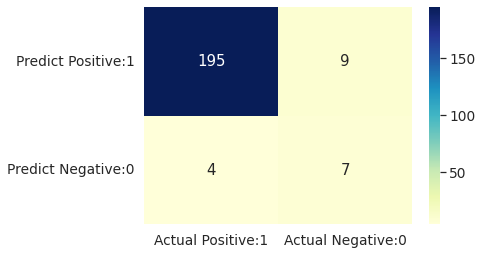

In [231]:
from sklearn.metrics import confusion_matrix

print('Confusion matrix\n\n', cm)

cm = confusion_matrix(y_test, y_pred)

print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

***Bagging Meta Estimator for Logistic Regression***

In [237]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
model = BaggingClassifier(estimator=LogisticRegression(), n_estimators=10, random_state=0)
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix 
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.9766718506998445
Testing accuracy : 0.9395348837209302
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       204
           1       0.44      0.73      0.55        11

    accuracy                           0.94       215
   macro avg       0.71      0.84      0.76       215
weighted avg       0.96      0.94      0.95       215

[[194  10]
 [  3   8]]


Confusion matrix

 [[194  10]
 [  5   6]]

True Positives(TP) =  194

True Negatives(TN) =  8

False Positives(FP) =  10

False Negatives(FN) =  3


<Axes: >

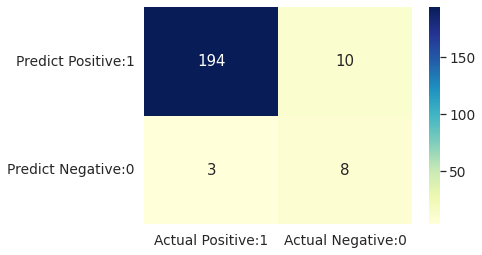

In [235]:
from sklearn.metrics import confusion_matrix

print('Confusion matrix\n\n', cm)

cm = confusion_matrix(y_test, y_pred)

print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')